In [111]:
import numpy as np  # - this is the numpy package imported and represented as np 
import pandas as pd  # - this is the pandas package imported and represented as pd
import matplotlib.pyplot as plt  # - this is the pyplot function of matplot library package imported and represented
                                 # - as pd
import seaborn as sns # - seaborn package
import os
import scipy.stats as st # for statistics
%matplotlib inline
import statsmodels.api as sm

In [112]:
# importing sci-kit learn(sklearn) package for machine learning in python:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
df = pd.read_csv("/Users/mac/Downloads/Concepts of AI/Workshop - Regression/cancer_data.csv")

In [114]:
df

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [116]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

## filling the values Employed16_over with its mean , since null isnt much

In [117]:
df['PctEmployed16_Over'] = df['PctEmployed16_Over'].fillna(df['PctEmployed16_Over'].median())

In [118]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over            0
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

## Changing the dtype of binnedInc column to float and converting values to mean

In [119]:
binn = df['binnedInc'].str.replace('(','')
binn2 = binn.str.replace('[','')
binn3 = binn2.str.replace(']','')
# print(binn3)
split_bin =binn3.str.split(',',expand=True).astype(float)

mean_bin = (split_bin[0] + split_bin[1])/2
# print(mean_bin)
df['binnedInc'] = mean_bin

/var/folders/zn/m23qfnl563qb4ppg4jvvsj0r0000gn/T/ipykernel_11266/189511735.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  binn = df['binnedInc'].str.replace('(','')
/var/folders/zn/m23qfnl563qb4ppg4jvvsj0r0000gn/T/ipykernel_11266/189511735.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  binn2 = binn.str.replace('[','')
/var/folders/zn/m23qfnl563qb4ppg4jvvsj0r0000gn/T/ipykernel_11266/189511735.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  binn3 = binn2.str.replace(']','')


In [120]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,48878.118280,45.272333,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,16889.719362,45.304480,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,28429.050000,22.300000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,38888.250000,37.700000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,46611.300000,41.000000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,52796.000000,44.000000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,93564.750000,624.000000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   float64
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [122]:
# new_df = df.drop(['PctSomeCol18_24', 'PctPrivateCoverageAlone' ], axis=1)

## check for outliers

/var/folders/zn/m23qfnl563qb4ppg4jvvsj0r0000gn/T/ipykernel_11266/3964959996.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


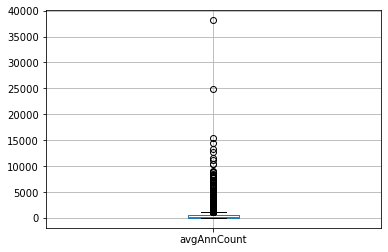

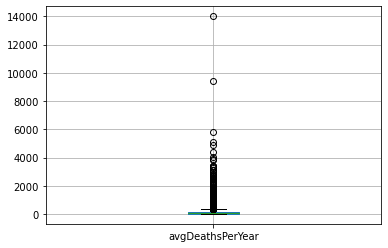

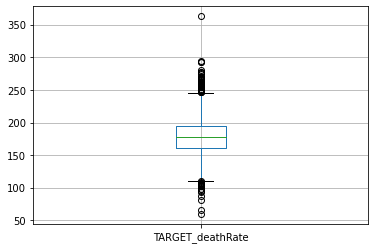

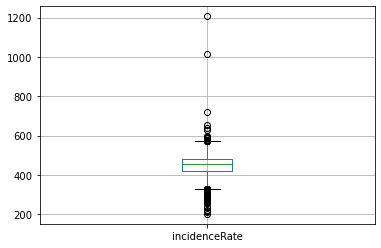

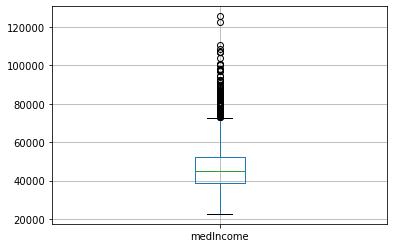

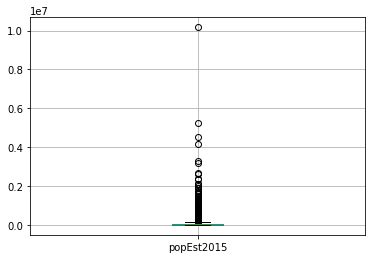

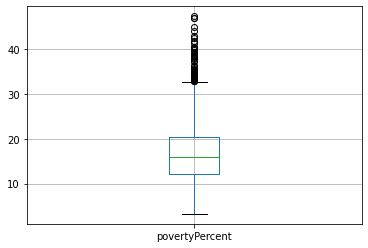

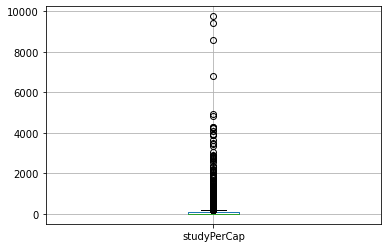

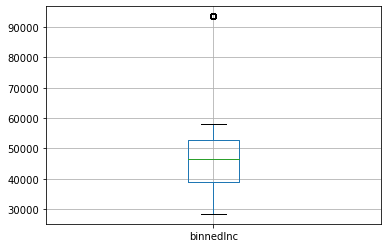

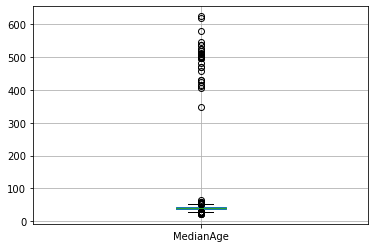

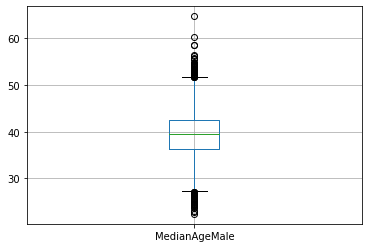

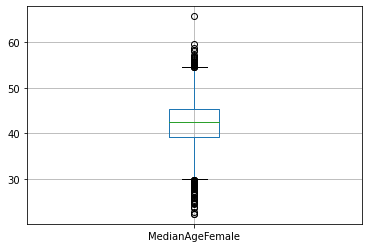

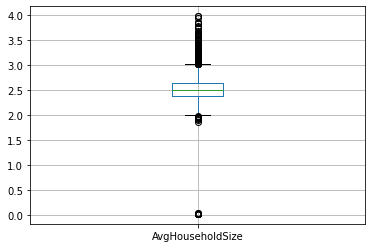

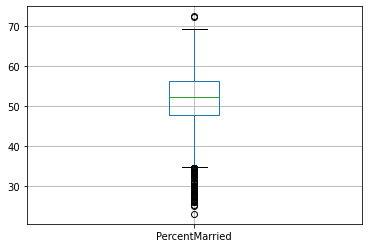

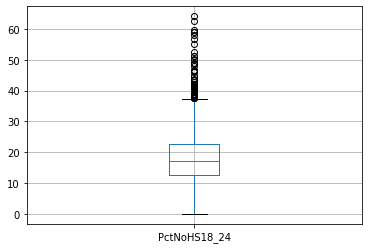

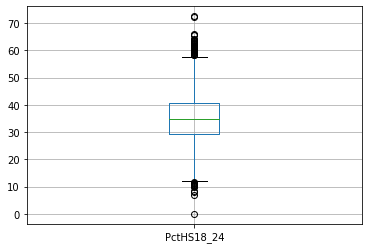

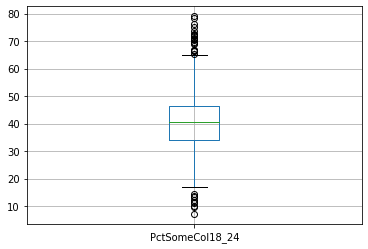

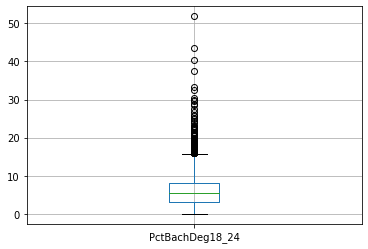

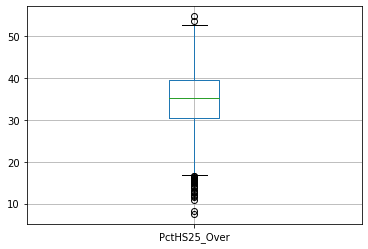

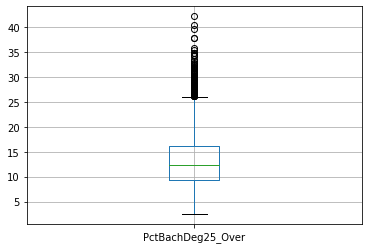

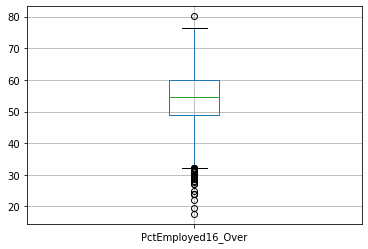

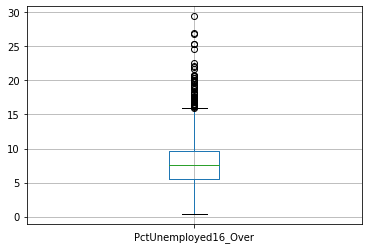

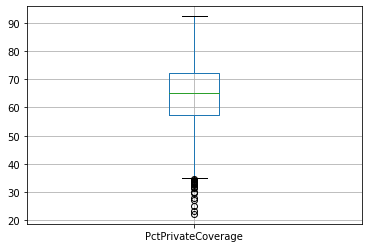

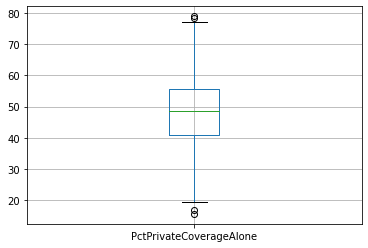

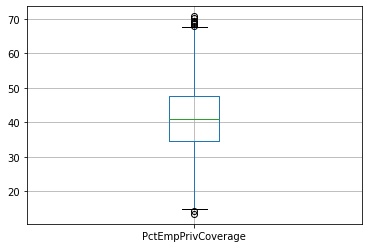

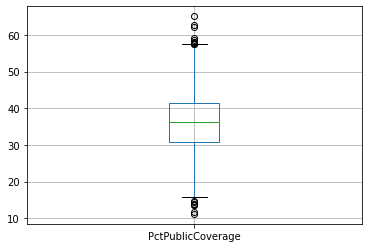

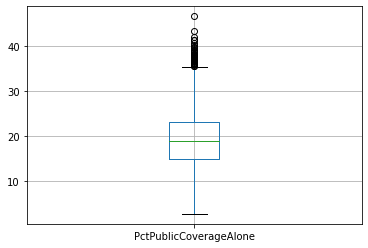

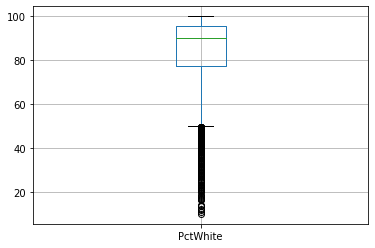

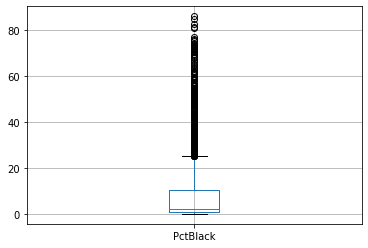

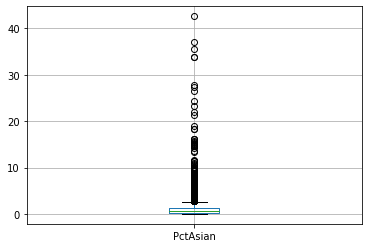

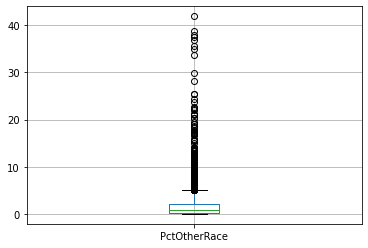

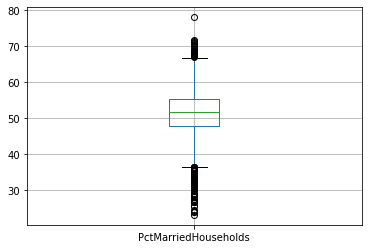

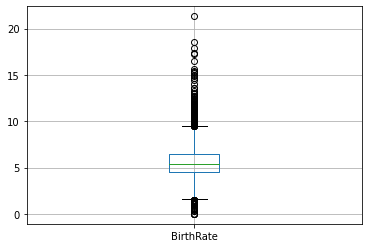

In [123]:
for i in df:
   if(i == 'Geography'):
      continue
   else:
    plt.figure()
    df.boxplot(column = i)


In [124]:
# from the box plot its obvious every observation / features has outliers including the dependent variable

In [125]:
print('count of outliers below lower whisker is :',
      (df['TARGET_deathRate']<df['TARGET_deathRate'].quantile(0.25) - (1.5*(st.iqr(df['TARGET_deathRate'])))).sum())

print('count of outliers above upper whisker is :',
      (df['TARGET_deathRate']>df['TARGET_deathRate'].quantile(0.75)+(1.5*(st.iqr(df['TARGET_deathRate'])))).sum())



count of outliers below lower whisker is : 21
count of outliers above upper whisker is : 43


## Dropping Outliers from the target variable(dependent) , to maximize the efficiency of the model 

In [126]:
# since target variable has outliers less then 10% of the data, drop the outliers
new_df=df[(df['TARGET_deathRate']>df['TARGET_deathRate'].quantile(0.25)-(1.5*(st.iqr(df['TARGET_deathRate'])))) &
       (df['TARGET_deathRate']<df['TARGET_deathRate'].quantile(0.75)+(1.5*(st.iqr(df['TARGET_deathRate']))))]

In [127]:
new_df

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,93564.75,39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,49534.00,33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,49534.00,45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,43962.70,42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,49534.00,48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,46611.30,44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,49534.00,30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,52796.00,30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,49534.00,39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [128]:
new_df.shape

(2983, 34)

## checking the distrubution of features / observations/ variables using the kernel density estimation plot

/var/folders/zn/m23qfnl563qb4ppg4jvvsj0r0000gn/T/ipykernel_11266/1135153429.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

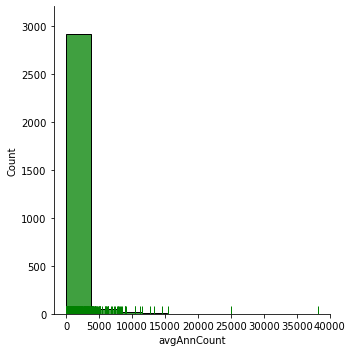

<Figure size 432x288 with 0 Axes>

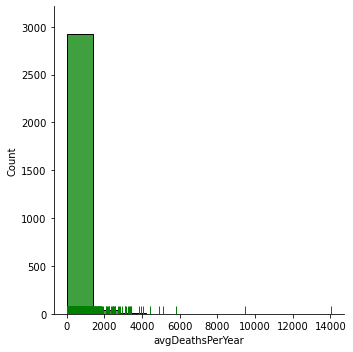

<Figure size 432x288 with 0 Axes>

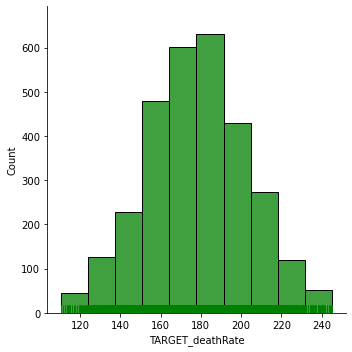

<Figure size 432x288 with 0 Axes>

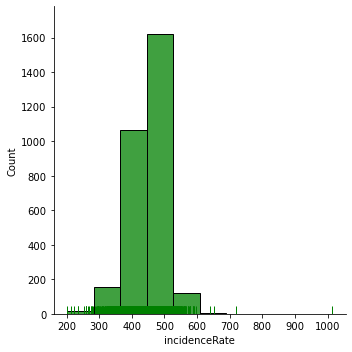

<Figure size 432x288 with 0 Axes>

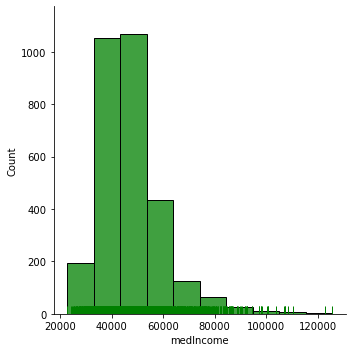

<Figure size 432x288 with 0 Axes>

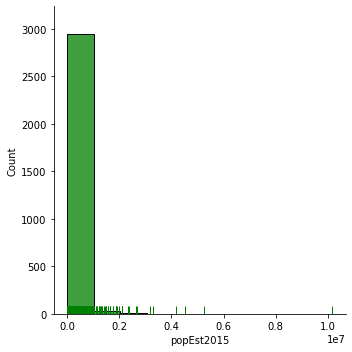

<Figure size 432x288 with 0 Axes>

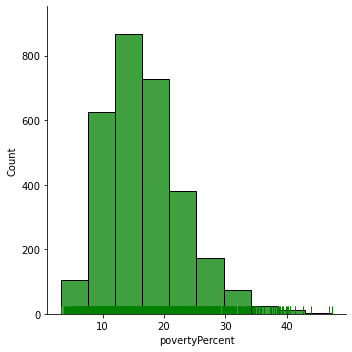

<Figure size 432x288 with 0 Axes>

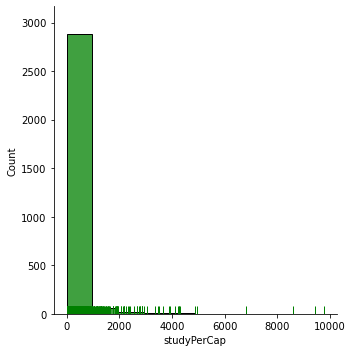

<Figure size 432x288 with 0 Axes>

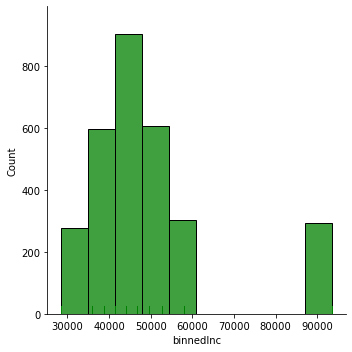

<Figure size 432x288 with 0 Axes>

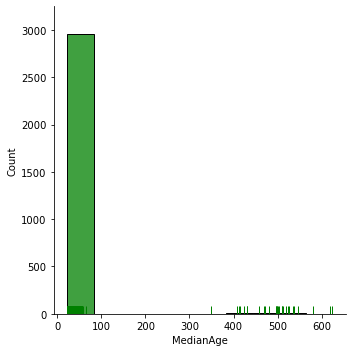

<Figure size 432x288 with 0 Axes>

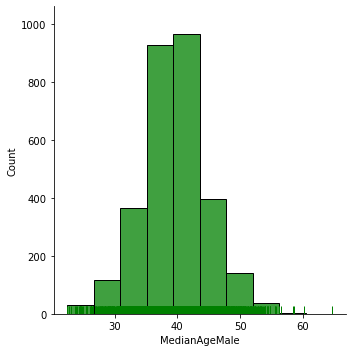

<Figure size 432x288 with 0 Axes>

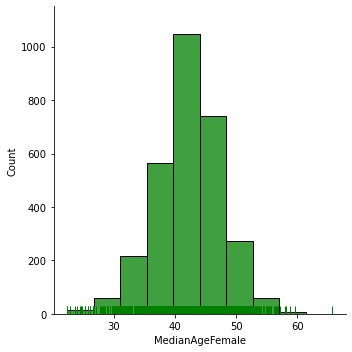

<Figure size 432x288 with 0 Axes>

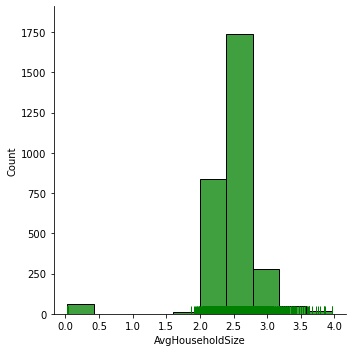

<Figure size 432x288 with 0 Axes>

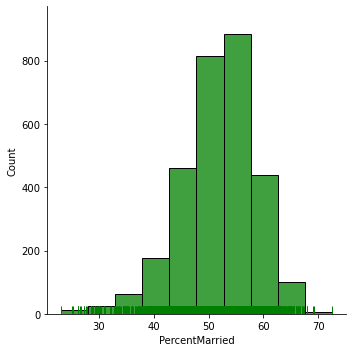

<Figure size 432x288 with 0 Axes>

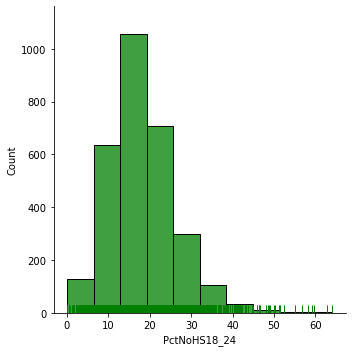

<Figure size 432x288 with 0 Axes>

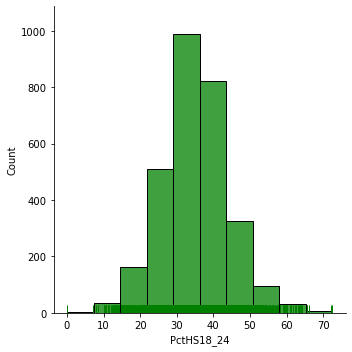

<Figure size 432x288 with 0 Axes>

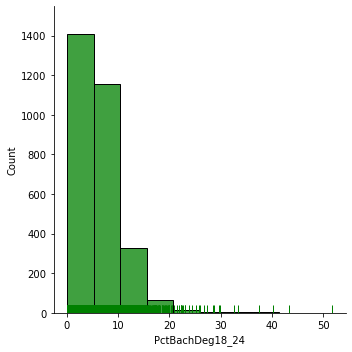

<Figure size 432x288 with 0 Axes>

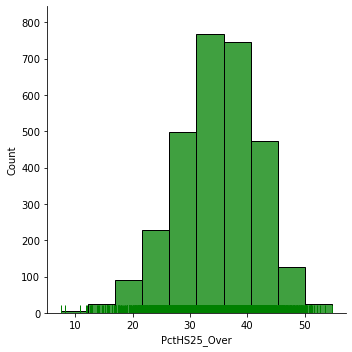

<Figure size 432x288 with 0 Axes>

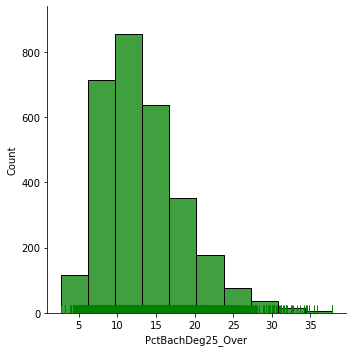

<Figure size 432x288 with 0 Axes>

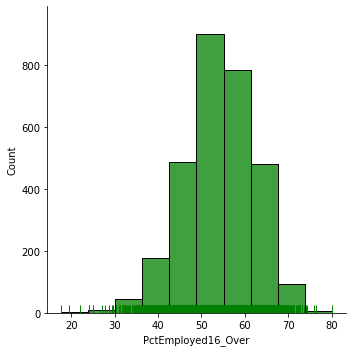

<Figure size 432x288 with 0 Axes>

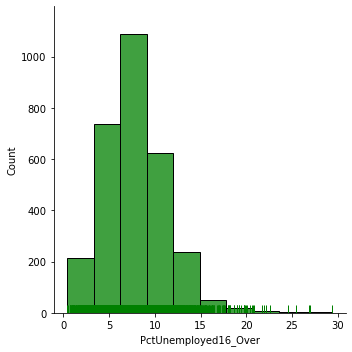

<Figure size 432x288 with 0 Axes>

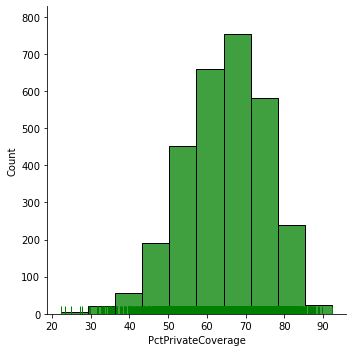

<Figure size 432x288 with 0 Axes>

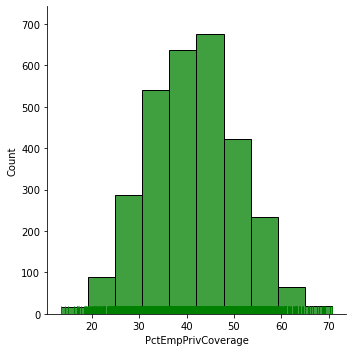

<Figure size 432x288 with 0 Axes>

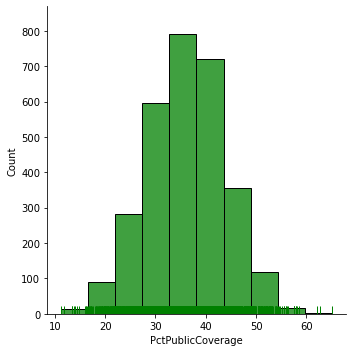

<Figure size 432x288 with 0 Axes>

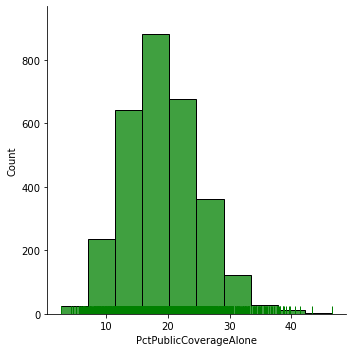

<Figure size 432x288 with 0 Axes>

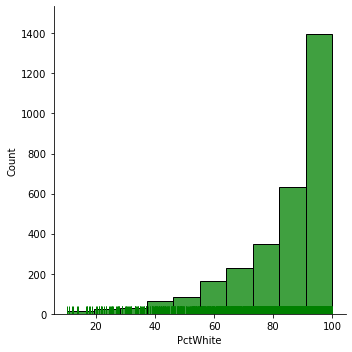

<Figure size 432x288 with 0 Axes>

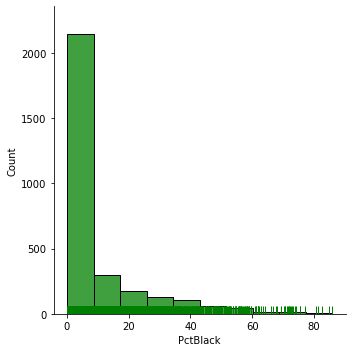

<Figure size 432x288 with 0 Axes>

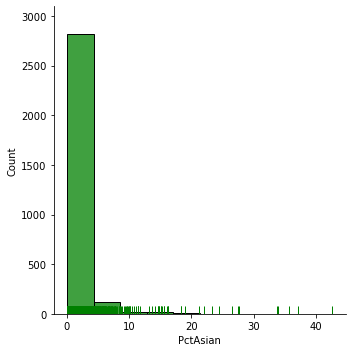

<Figure size 432x288 with 0 Axes>

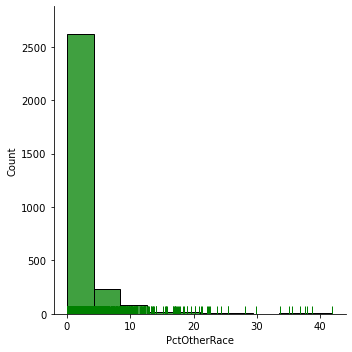

<Figure size 432x288 with 0 Axes>

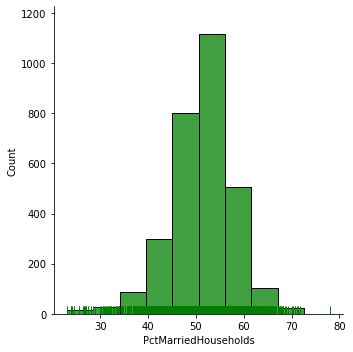

<Figure size 432x288 with 0 Axes>

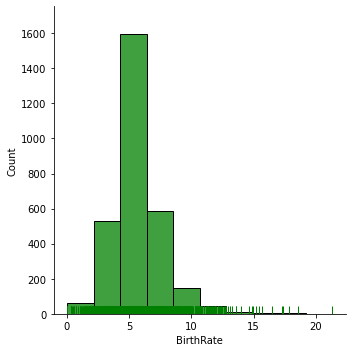

In [129]:
for i in new_df.columns:
    if (i=='Geography'or i == 'PctSomeCol18_24' or i == 'PctPrivateCoverageAlone'):
        continue
    else:
        plt.figure()
        sns.displot(new_df[i], kde=False,color='g',bins=10,rug=True)


In [130]:
# corr matrix
new_df.corr()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.940412,-0.156095,0.079883,0.270707,0.927859,-0.133425,0.083899,0.249491,-0.023936,...,0.185339,0.199569,-0.174420,-0.090250,-0.141508,0.033868,0.435093,0.209319,-0.110960,-0.036610
avgDeathsPerYear,0.940412,1.000000,-0.096126,0.067589,0.223946,0.977639,-0.063680,0.064325,0.213549,-0.024450,...,0.123932,0.157188,-0.132043,-0.023183,-0.192670,0.086791,0.442975,0.216236,-0.167232,-0.075508
TARGET_deathRate,-0.156095,-0.096126,1.000000,0.395670,-0.423912,-0.127569,0.392307,-0.035002,-0.386471,-0.003203,...,-0.349074,-0.261755,0.376440,0.412648,-0.167965,0.260651,-0.198318,-0.193480,-0.288228,-0.078517
incidenceRate,0.079883,0.067589,0.395670,1.000000,0.029652,0.030455,-0.037924,0.077570,0.026487,0.014131,...,0.139957,0.172485,0.009677,-0.006076,-0.007992,0.113366,-0.003181,-0.212201,-0.154739,-0.111214
medIncome,0.270707,0.223946,-0.423912,0.029652,1.000000,0.236292,-0.788700,0.049143,0.926969,-0.011874,...,0.785644,0.746958,-0.748532,-0.714885,0.170745,-0.270312,0.426973,0.074994,0.449365,-0.019047
popEst2015,0.927859,0.977639,-0.127569,0.030455,0.236292,1.000000,-0.061984,0.056563,0.223002,-0.025112,...,0.131082,0.156008,-0.160782,-0.037660,-0.195703,0.075299,0.464100,0.242456,-0.134074,-0.058751
povertyPercent,-0.133425,-0.063680,0.392307,-0.037924,-0.788700,-0.061984,1.000000,-0.061581,-0.718858,-0.029407,...,-0.757340,-0.681045,0.635047,0.786756,-0.524057,0.520434,-0.154383,0.063906,-0.611475,-0.002644
studyPerCap,0.083899,0.064325,-0.035002,0.077570,0.049143,0.056563,-0.061581,1.000000,0.034956,-0.025596,...,0.077475,0.102228,-0.056661,-0.061719,0.028063,-0.027221,0.064545,-0.013540,-0.054000,0.009830
binnedInc,0.249491,0.213549,-0.386471,0.026487,0.926969,0.223002,-0.718858,0.034956,1.000000,0.001268,...,0.726710,0.692503,-0.704671,-0.657112,0.132723,-0.230132,0.388835,0.069877,0.409174,-0.019920
MedianAge,-0.023936,-0.024450,-0.003203,0.014131,-0.011874,-0.025112,-0.029407,-0.025596,0.001268,1.000000,...,-0.023270,-0.037102,0.049330,-0.004405,0.031606,-0.015138,-0.037810,-0.029359,0.012139,-0.007205


<AxesSubplot:>

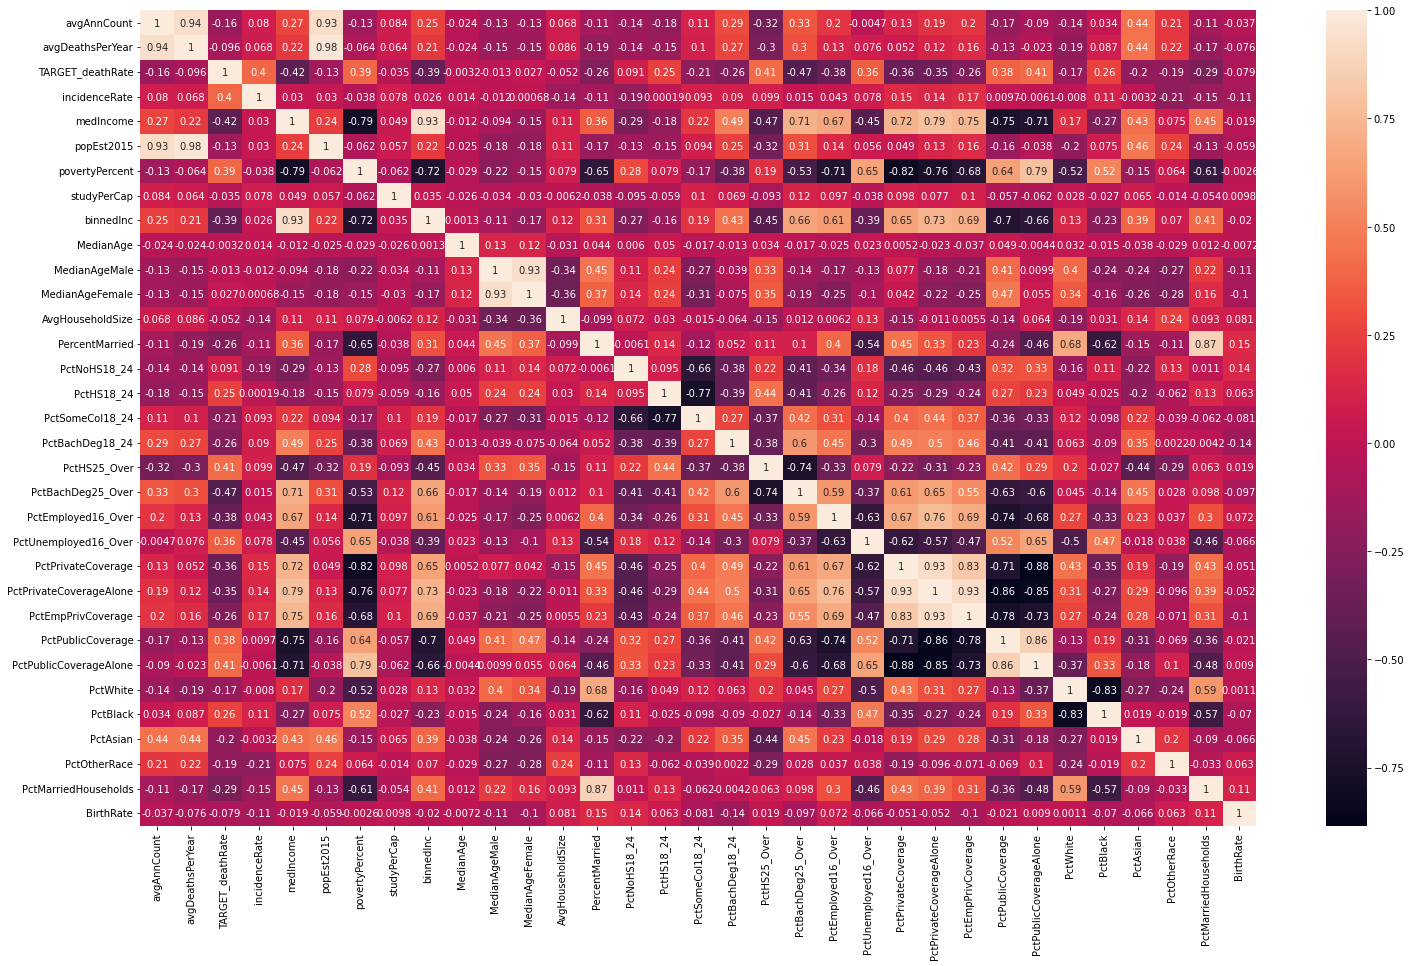

In [131]:
plt.figure(figsize=(25,15))
sns.heatmap(new_df.corr(), annot = True)

# perform ols (Ordinary Least Squares) test to check the significant features 

In [132]:
# divide our data to dependent/target variables (y) and independent variables x

x = new_df.drop(['Geography' ,'PctSomeCol18_24','PctPrivateCoverageAlone','TARGET_deathRate'],axis=1)

# here we assign all the independt variables to x except the ones with lots of null values and 
# string or object values
# -- also add constant values to our x for coefficient 
X = sm.add_constant(x)

y = new_df['TARGET_deathRate']

In [133]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     92.54
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        06:23:20   Log-Likelihood:                -12850.
No. Observations:                2983   AIC:                         2.576e+04
Df Residuals:                    2952   BIC:                         2.595e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    184.9422     15.002     12.328      0.000     155.526     214.358
avgAnnCount               -0.0039      0.001     -5.362      0.000      -0.005      -0.002
avgDeathsPerYear           0.0199      0.004      5.434      0.000       0.013       0.027
incidenceRate              0.1682      0.007     23.286      0.000       0.154       0.182
medIncome                -3.1e-05      0.000     -0.301      0.763      -0.000       0.000
popEst2015             -1.585e-05   5.12e-06     -3.094      0.002   -2.59e-05   -5.81e-06
povertyPercent            -0.0567      0.158     -0.359      0.720      -0.367       0.253
studyPerCap               -0.0002      0.001     -0.285      0.776      -0.001       0.001
binnedInc              -1.737e-05   5.33e-05     -0.326      0.745      -0.000    8.72e-05
MedianAge                 -0.0056      0.007     -0.750      0.454      -0.020       0.009
MedianAgeMale             -0.5836      0.199     -2.926      0.003      -0.975      -0.193
MedianAgeFemale           -0.0227      0.207     -0.110      0.913      -0.428       0.383
AvgHouseholdSize           0.5056      0.911      0.555      0.579      -1.282       2.293
PercentMarried             1.0497      0.161      6.508      0.000       0.733       1.366
PctNoHS18_24              -0.0897      0.054     -1.677      0.094      -0.195       0.015
PctHS18_24                 0.1892      0.047      4.012      0.000       0.097       0.282
PctBachDeg18_24            0.0174      0.104      0.167      0.867      -0.187       0.221
PctHS25_Over               0.4593      0.093      4.965      0.000       0.278       0.641
PctBachDeg25_Over         -1.0456      0.150     -6.977      0.000      -1.339      -0.752
PctEmployed16_Over        -0.4714      0.096     -4.913      0.000      -0.660      -0.283
PctUnemployed16_Over       0.2914      0.160      1.823      0.068      -0.022       0.605
PctPrivateCoverage        -0.4599      0.126     -3.661      0.000      -0.706      -0.214
PctEmpPrivCoverage         0.2848      0.099      2.879      0.004       0.091       0.479
PctPublicCoverage         -0.2933      0.218     -1.348      0.178      -0.720       0.133
PctPublicCoverageAlone     0.2506      0.271      0.925      0.355      -0.281       0.782
PctWhite                  -0.0912      0.056     -1.629      0.103      -0.201       0.019
PctBlack                   0.0035      0.054      0.065      0.948      -0.103       0.109
PctAsian                   0.0342      0.178      0.192      0.848      -0.315       0.384
PctOtherRace              -0.8400      0.118     -7.134      0.000      -1.071      -0.609
PctMarriedHouseholds      -1.1047      0.153     -7.215      0.000      -1.405      -0.804
BirthRate                 -0.7573      0.185     -4.093      0.000      -1.120  

# Now we use lots of statiscal process to get features that best works for the modelling

## 1.  multicolliniarity with VIF (variance inflation factor)

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns)

# this code asigns vif the variance inflation factor  of x dataframe values for each column i

,vif
avgAnnCount,10.000506
avgDeathsPerYear,31.835212
incidenceRate,1.269425
medIncome,13.837620
popEst2015,26.477778
povertyPercent,8.814903
studyPerCap,1.051162
binnedInc,7.324402
MedianAge,1.026666
MedianAgeMale,9.888853


In [137]:
# NExt is to check for features with high VIF mostly greater than 10
# features which has highly multicollinarity
vif_after=pd.DataFrame({'vif': vif[1:]}, index=x.columns) # takes all the vif from all independent variables 
vif_after[vif_after['vif']>10]      # filters the row to get ones above 10 

,vif
avgAnnCount,10.000506
avgDeathsPerYear,31.835212
medIncome,13.837620
popEst2015,26.477778
MedianAgeFemale,10.870964
PercentMarried,11.070438
PctPrivateCoverage,15.848999
PctPublicCoverage,25.659336
PctPublicCoverageAlone,23.667921


## 2. Now we check the Pvalues of the model 

In [138]:
#pvalues of each feature or variables , helps us to see the strength or significane of the variable to the model
 # lets call our pvalues p
p = model.pvalues 

In [139]:
p

const                      4.365513e-34
avgAnnCount                8.881730e-08
avgDeathsPerYear           5.965525e-08
incidenceRate             3.002798e-110
medIncome                  7.633218e-01
popEst2015                 1.991236e-03
povertyPercent             7.198764e-01
studyPerCap                7.759901e-01
binnedInc                  7.446755e-01
MedianAge                  4.535147e-01
MedianAgeMale              3.455874e-03
MedianAgeFemale            9.127339e-01
AvgHouseholdSize           5.791681e-01
PercentMarried             8.899648e-11
PctNoHS18_24               9.361301e-02
PctHS18_24                 6.166395e-05
PctBachDeg18_24            8.673665e-01
PctHS25_Over               7.277228e-07
PctBachDeg25_Over          3.696783e-12
PctEmployed16_Over         9.448248e-07
PctUnemployed16_Over       6.841376e-02
PctPrivateCoverage         2.556585e-04
PctEmpPrivCoverage         4.016497e-03
PctPublicCoverage          1.776596e-01
PctPublicCoverageAlone     3.550961e-01


#  3. with the pvalues we can evaluate  the features with good significant

# # features which as passed the statistical test

In [140]:
features = [] # creating an empty list that will hold the features or variables that scales through
for i in range(p.shape[0]):
    if (p[i] < 0.05):
        features.append(p.index[i])
    else:
        continue
print(features)
# 0.05 used here is the commonly wide acceptable threshold for balance in type I and II error in hypothesis testing 

['const', 'avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015', 'MedianAgeMale', 'PercentMarried', 'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']


In [141]:
#here we have 16 features so now we exclude the 'const' feature which was the coefficient constant we added earlier 
#
X = new_df[['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015', 'MedianAgeMale', 'PercentMarried', 
      'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage', 
      'PctEmpPrivCoverage', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']]


In [142]:
X

,avgAnnCount,avgDeathsPerYear,incidenceRate,popEst2015,MedianAgeMale,PercentMarried,PctHS18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,489.800000,260131,36.9,52.5,39.5,23.2,19.6,51.9,75.1,41.6,1.843479,52.856076,6.118831
1,173.000000,70,411.600000,43269,32.2,44.5,22.4,26.0,22.7,55.9,70.2,43.6,3.741352,45.372500,4.333096
2,102.000000,50,349.700000,21026,44.0,54.2,36.6,29.0,16.0,45.9,63.7,34.9,2.747358,54.444868,3.729488
3,427.000000,202,430.400000,75882,42.2,52.7,41.2,31.6,9.3,48.3,58.4,35.0,1.362643,51.021514,4.603841
4,57.000000,26,350.100000,10321,47.8,57.8,43.0,33.4,15.0,48.2,61.6,35.1,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,453.549422,6343,41.1,51.0,27.9,32.2,15.2,51.7,78.3,44.6,1.700468,51.063830,7.773512
3043,1962.667684,43,453.549422,37118,29.3,52.6,33.9,23.1,12.4,70.1,64.5,48.6,14.130288,52.007937,8.186470
3044,1962.667684,46,453.549422,34536,30.5,54.8,44.5,23.0,12.8,64.8,62.0,47.8,5.680705,55.153949,7.809192
3045,1962.667684,52,453.549422,25609,36.9,58.8,37.2,36.1,14.4,54.5,75.9,49.6,2.131790,58.484232,7.582938


In [143]:
y

0       164.9
1       161.3
2       174.7
3       194.8
4       144.4
        ...  
3042    149.6
3043    150.1
3044    153.9
3045    175.0
3046    213.6
Name: TARGET_deathRate, Length: 2983, dtype: float64

## 4. WE check the distribution linear relationship  of the independent variables with target variable

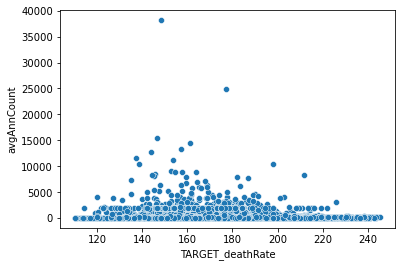

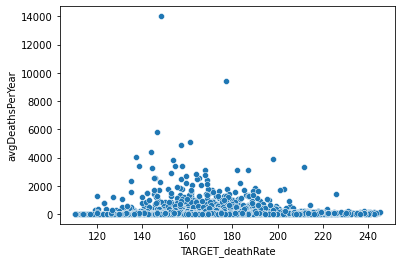

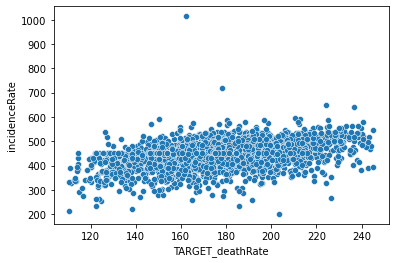

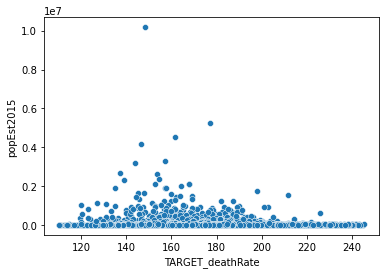

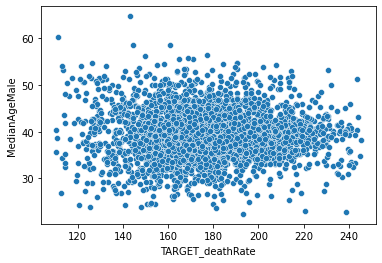

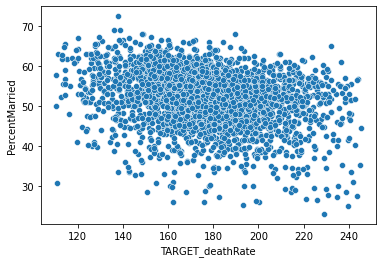

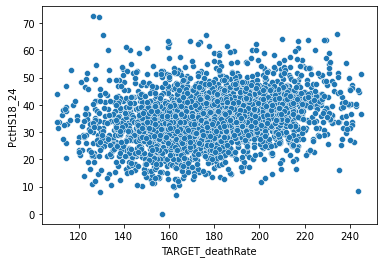

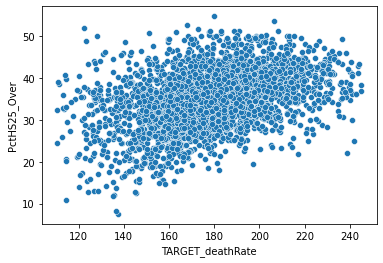

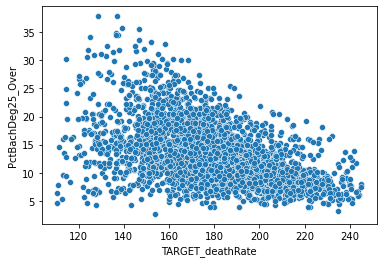

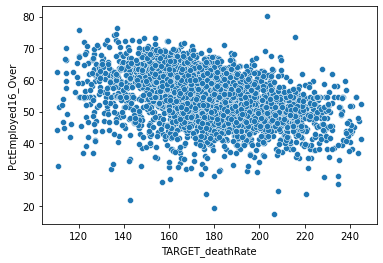

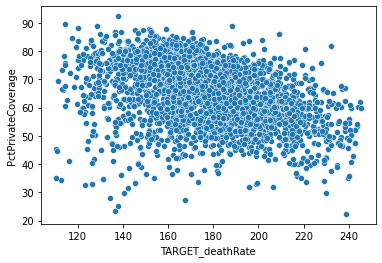

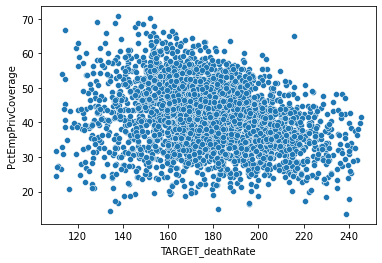

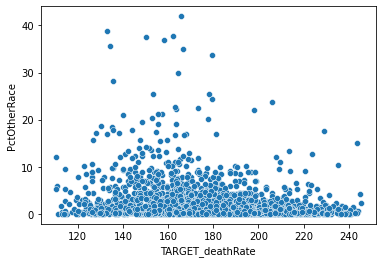

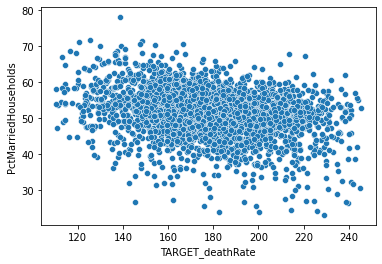

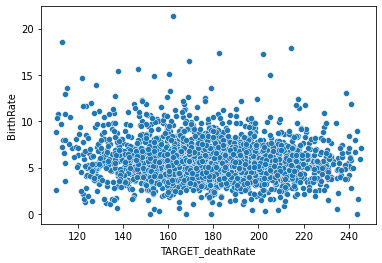

In [144]:
for i in X.columns:
    plt.figure()
    sns.scatterplot(x=new_df['TARGET_deathRate'],y=i,data=new_df)

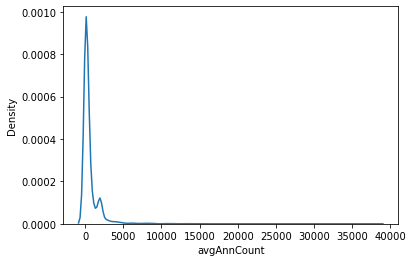

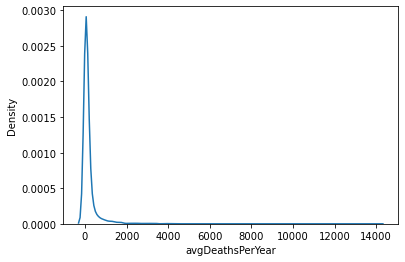

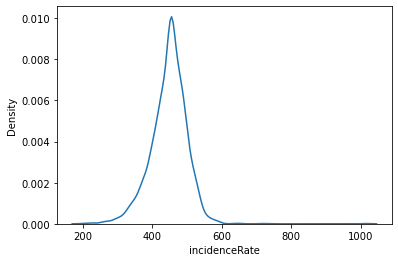

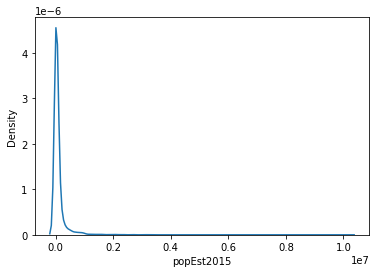

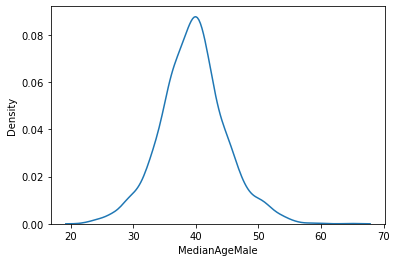

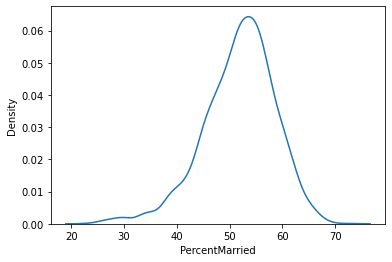

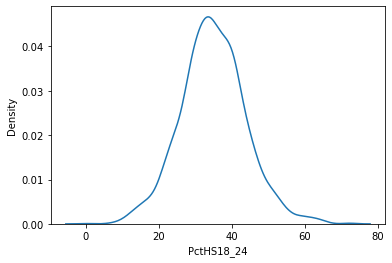

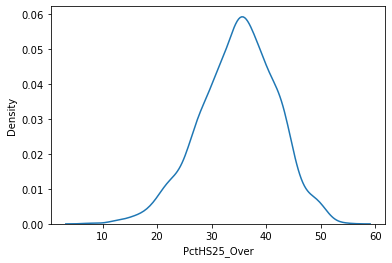

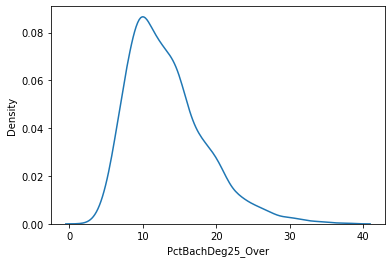

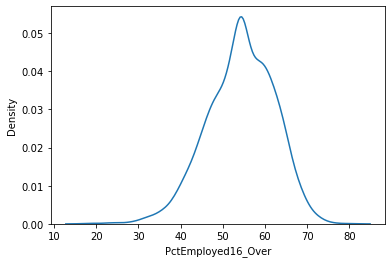

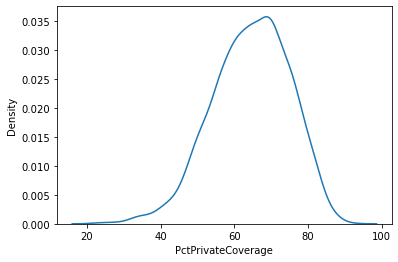

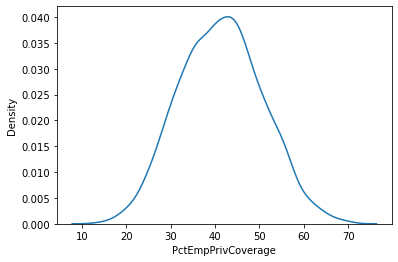

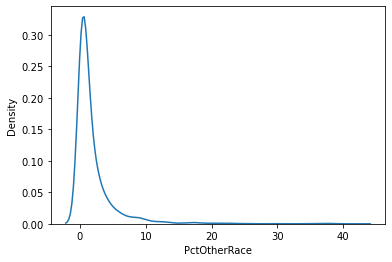

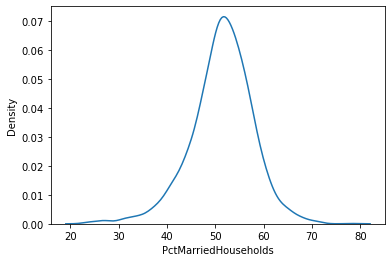

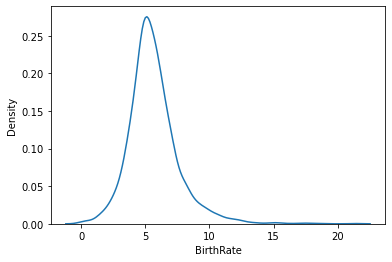

In [145]:
for i in X.columns:
        plt.figure()
        sns.kdeplot(X[i])

In [146]:
nor=[]
for i in  X.columns:
    if st.shapiro(X[i])[1]<0.05:
        nor.append(i)
    else:
        continue
print(nor)

['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015', 'MedianAgeMale', 'PercentMarried', 'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']


In [147]:
X=X[['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015', 'MedianAgeMale', 'PercentMarried',
        'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage', 
        'PctEmpPrivCoverage', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']]

In [148]:
for i in X:
    cc=st.skew(X[i])
    print(i,':  ',cc)

avgAnnCount :   10.607632129548598
avgDeathsPerYear :   11.835374422230867
incidenceRate :   -0.0656492637185816
popEst2015 :   14.149152891936435
MedianAgeMale :   0.14108181837354597
PercentMarried :   -0.645804207341163
PctHS18_24 :   0.175607975324238
PctHS25_Over :   -0.30819745919432034
PctBachDeg25_Over :   1.010141009157939
PctEmployed16_Over :   -0.3812864198171311
PctPrivateCoverage :   -0.38097253521641244
PctEmpPrivCoverage :   0.08284073271539542
PctOtherRace :   4.968868632313063
PctMarriedHouseholds :   -0.5099593801930482
BirthRate :   1.3193960263778897


In [151]:
right=[]
left=[]
for i in  X.columns:
    if st.skew(X[i])>0.5:
        right.append(i)
    elif st.skew(X[i])<-0.5:
            left.append(i)
    else:
        continue
print('right skwed :\n ', right,'\n\nleft skwed :\n ',left)

right skwed :
  ['avgAnnCount', 'avgDeathsPerYear', 'popEst2015', 'PctBachDeg25_Over', 'PctOtherRace', 'BirthRate'] 

left skwed :
  ['PercentMarried', 'PctMarriedHouseholds']


In [ ]:
## transformation below

In [152]:
X['avgDeathsPerYear']=np.log((X['avgDeathsPerYear']))
X['avgAnnCount']=np.log((X['avgAnnCount']))
X['popEst2015']=np.log((X['popEst2015']))
X['PctBachDeg25_Over']=np.log((X['PctBachDeg25_Over']))
X['PctOtherRace']=(np.log((X['PctOtherRace'])+1))
X['BirthRate']=np.sqrt((X['BirthRate']))
X['PercentMarried']=((X['PercentMarried'])**2)
X['PctMarriedHouseholds']=((X['PctMarriedHouseholds'])**2)

In [154]:
# after transformation 

for i in X:
    a=st.skew(X[i])
    print(i,':  ',a)

avgAnnCount :   0.33480112525630185
avgDeathsPerYear :   0.41544063495841105
incidenceRate :   -0.0656492637185816
popEst2015 :   0.5023113369420232
MedianAgeMale :   0.14108181837354597
PercentMarried :   -0.15927316028813485
PctHS18_24 :   0.175607975324238
PctHS25_Over :   -0.30819745919432034
PctBachDeg25_Over :   -0.04638513379945553
PctEmployed16_Over :   -0.3812864198171311
PctPrivateCoverage :   -0.38097253521641244
PctEmpPrivCoverage :   0.08284073271539542
PctOtherRace :   1.2103849245236493
PctMarriedHouseholds :   0.09417968044104386
BirthRate :   0.006710459376733157


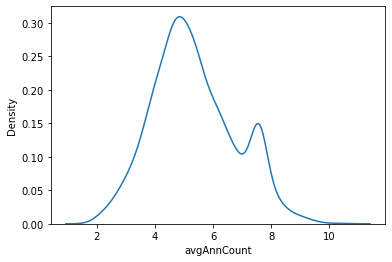

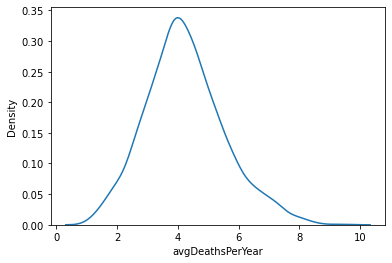

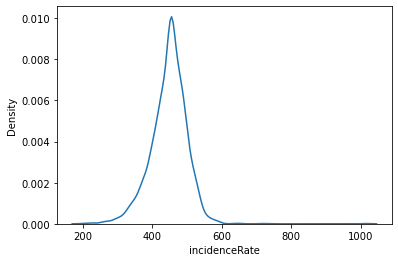

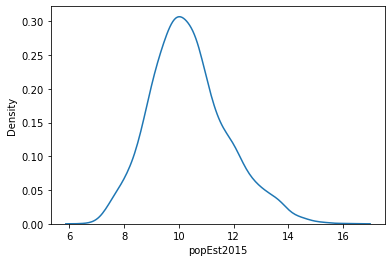

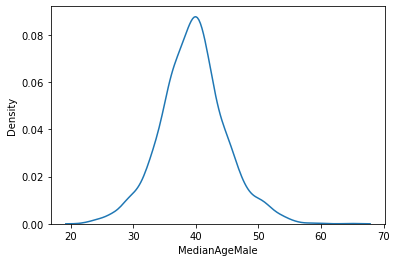

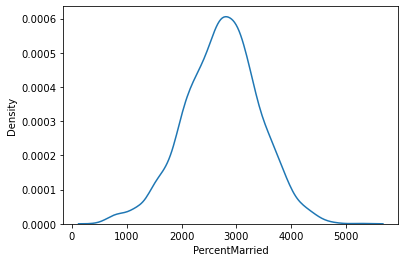

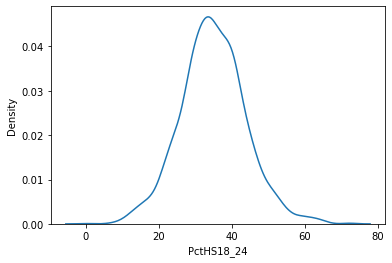

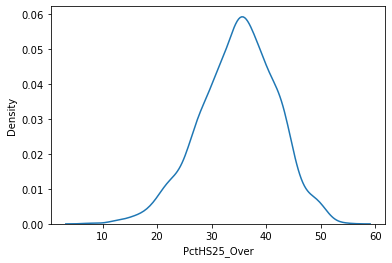

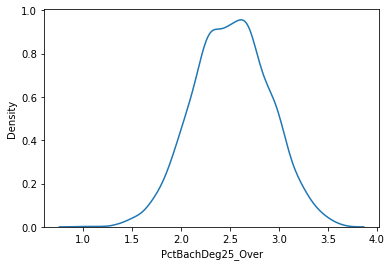

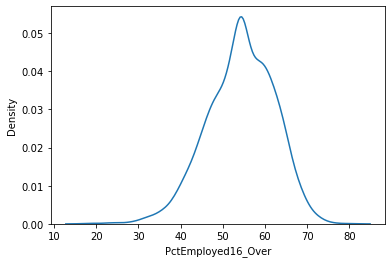

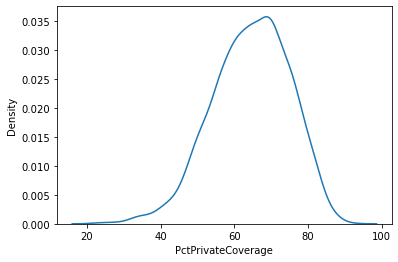

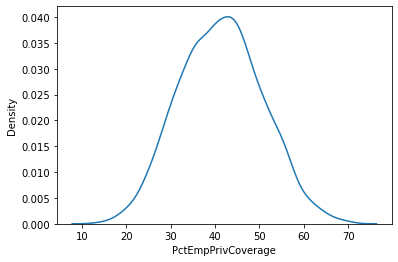

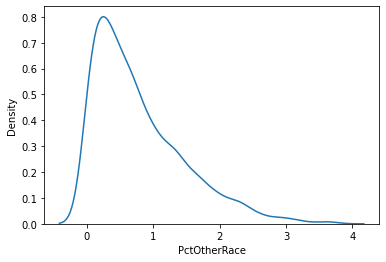

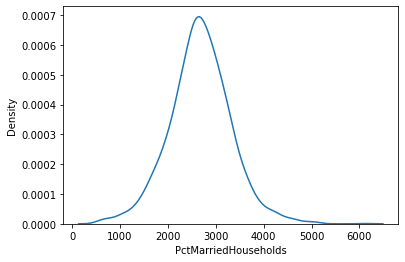

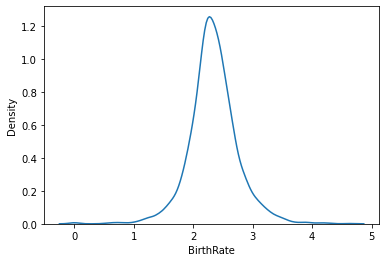

In [155]:
for i in X.columns:
        plt.figure()
        sns.kdeplot(X[i])

In [166]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 10)

In [167]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [168]:
y_predict=regr.predict(X_test)

In [169]:
round(r2_score(y_test, y_predict), 2)

0.7

In [170]:
print('r2 score for test data :',regr.score(X_test, y_test))

r2 score for test data : 0.7041506817938257


In [171]:
print('rmse score :',np.sqrt(mean_squared_error(y_predict,y_test)))

rmse score : 13.505970109925766


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


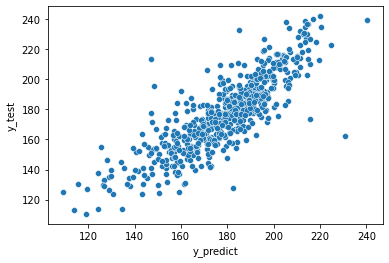

In [172]:
sns.scatterplot(y_predict,y_test)
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.show()

In [181]:
y_test

1135    153.9
215     206.9
1667    203.0
603     130.6
624     129.5
        ...  
650     168.3
1536    189.7
1840    156.3
98      166.9
2631    156.9
Name: TARGET_deathRate, Length: 597, dtype: float64

In [182]:
y_predict

array([171.33998453, 194.81236267, 210.64833942, 115.48531346,
       150.27994744, 178.8852432 , 196.56196939, 180.99624995,
       183.60531252, 182.43077447, 177.54864855, 187.9399116 ,
       175.89373692, 159.14037517, 193.33380529, 200.63206677,
       211.37777824, 178.99954603, 155.07722952, 215.58763446,
       152.91307513, 140.78850682, 219.67484907, 189.80783498,
       184.19282758, 125.49311728, 177.40010597, 199.86679979,
       185.21636282, 188.29530367, 146.08222204, 197.19797498,
       192.29760348, 196.95647231, 169.14791414, 192.44434393,
       188.69002217, 124.38589702, 165.56151183, 183.47594461,
       172.24050042, 203.94854555, 202.21074829, 162.27074656,
       190.96365509, 188.48981104, 192.50705842, 155.68469107,
       166.72690611, 183.36796223, 145.39170125, 190.9302238 ,
       213.96312141, 189.80498271, 181.07158959, 153.53458742,
       118.870414  , 177.93724853, 178.15013612, 167.20694426,
       164.0688542 , 188.69009049, 184.83453555, 202.51